Проект: вариант 1

Представьте, что вы работаете в компании, которая разрабатывает мобильные игры. К вам пришел менеджер с рядом задач по исследованию нескольких аспектов мобильного приложения:

    В первую очередь, его интересует показатель retention. Напишите функцию для его подсчета.
    Помимо этого, в компании провели A/B тестирование наборов акционных предложений. На основе имеющихся данных определите, какой набор можно считать лучшим и на основе каких метрик стоит принять правильное решение.
    Предложите метрики для оценки результатов последнего прошедшего тематического события в игре.

In [55]:
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt

Задание 1

Retention – один из самых важных показателей в компании. Ваша задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока). Данные лежат в папке shared и имеют следующую структуру:

    shared/problem1-reg_data.csv – данные о времени регистрации
    
    shared/problem1-auth_data.csv – данные о времени захода пользователей в игру

Функция должна быть написана на python. В ходе решения можно тестировать работу функции как на полном датасете, так и на части (сэмпле) данных.

In [2]:
# считаем данные о времени регистрации

reg_data = pd.read_csv('/home/jupyter-i-sharapova-17/shared/problem1-reg_data.csv', sep=';')
reg_data.head()

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5


In [3]:
# считаем данные о времени захода пользователей в игру

auth_data = pd.read_csv('/home/jupyter-i-sharapova-17/shared/problem1-auth_data.csv', sep=';')
auth_data.head()

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2


In [4]:
# посмотрим на типы данных

reg_data.dtypes

reg_ts    int64
uid       int64
dtype: object

In [5]:
auth_data.dtypes

auth_ts    int64
uid        int64
dtype: object

In [6]:
# время в формате UNIX time — число секунд, прошедших с 1970 года
# приведем к удобному формату колонки со временем

reg_data['reg_ts'] = pd.to_datetime(reg_data.reg_ts, unit='s')
reg_data.head()

,reg_ts,uid
0,1998-11-18 09:43:43,1
1,1999-07-22 22:38:09,2
2,2000-01-13 22:27:27,3
3,2000-05-28 14:19:01,4
4,2000-09-16 11:21:53,5


In [7]:
auth_data['auth_ts'] = pd.to_datetime(auth_data.auth_ts, unit='s')
auth_data.head()

,auth_ts,uid
0,1998-11-18 09:43:43,1
1,1999-07-22 22:38:09,2
2,1999-07-25 16:46:46,2
3,1999-07-31 03:50:15,2
4,1999-08-05 17:49:39,2


In [8]:
# проверим тип данных

reg_data.dtypes

reg_ts    datetime64[ns]
uid                int64
dtype: object

In [9]:
auth_data.dtypes

auth_ts    datetime64[ns]
uid                 int64
dtype: object

In [10]:
# проверим размерность датасетов

reg_data.shape

(1000000, 2)

In [11]:
auth_data.shape

(9601013, 2)

In [12]:
# посчитаем число уникальных id

reg_data.uid.nunique()

1000000

In [13]:
auth_data.uid.nunique()

1000000

In [14]:
# соединяем два датасета
# теперь мы можем посчитать, спустя какое время после совершения первого события совершен заход пользователя в игру

df = auth_data.merge(reg_data, how = 'left', on = 'uid')
df

,auth_ts,uid,reg_ts
0,1998-11-18 09:43:43,1,1998-11-18 09:43:43
1,1999-07-22 22:38:09,2,1999-07-22 22:38:09
2,1999-07-25 16:46:46,2,1999-07-22 22:38:09
3,1999-07-31 03:50:15,2,1999-07-22 22:38:09
4,1999-08-05 17:49:39,2,1999-07-22 22:38:09
...,...,...,...
9601008,2020-09-23 15:13:54,1110618,2020-09-23 15:13:54
9601009,2020-09-23 15:14:46,1110619,2020-09-23 15:14:46
9601010,2020-09-23 15:15:39,1110620,2020-09-23 15:15:39
9601011,2020-09-23 15:16:31,1110621,2020-09-23 15:16:31


Retention n-го дня - показывает сколько пользователей, пришедших в определенный день вернулось в продукт на n-ый
день с момента своего прихода. Например: 3 сентября в продукт пришло 200 новых пользователей. 7 сентября из этих
пользователей в продукт вернулось 20. То есть retention 4-го дня = 10%.

задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока)

In [15]:
# создадим новую колонку с разницей между моментом регистрации и заходом пользователя в игру
# возьмем только число дней

df['n_day'] = (df.auth_ts - df.reg_ts).dt.days
df

,auth_ts,uid,reg_ts,n_day
0,1998-11-18 09:43:43,1,1998-11-18 09:43:43,0
1,1999-07-22 22:38:09,2,1999-07-22 22:38:09,0
2,1999-07-25 16:46:46,2,1999-07-22 22:38:09,2
3,1999-07-31 03:50:15,2,1999-07-22 22:38:09,8
4,1999-08-05 17:49:39,2,1999-07-22 22:38:09,13
...,...,...,...,...
9601008,2020-09-23 15:13:54,1110618,2020-09-23 15:13:54,0
9601009,2020-09-23 15:14:46,1110619,2020-09-23 15:14:46,0
9601010,2020-09-23 15:15:39,1110620,2020-09-23 15:15:39,0
9601011,2020-09-23 15:16:31,1110621,2020-09-23 15:16:31,0


In [16]:
# найдем число пользователей, котрые зашли в приложение по дням, т.е. в 0 день после установки - зашли 100000
# на след день после установки - уже 40202 и т.д.

df_n_day = df.groupby('n_day') \
             .agg({'uid': 'count'})
df_n_day

,uid
n_day,
0,1000000
1,40202
2,42991
3,49152
4,56070
...,...
7715,1
7719,1
7720,1


In [17]:
# сохраним в переменную число пользователей в нулевой день

number_uid = df_n_day.iloc[0, 0]
number_uid

1000000

In [18]:
# напишем функцию которая на вход принимает номер дня
# делим число вернувшихся пользователей в n-ый день на число пользователей нулевого дня
# умножаем на 100 - для выражения в процентах и округляем до двух знаков после запятой

def retention_n_day(day_number):
    retention = round(df_n_day.iloc[day_number, 0] / df_n_day.iloc[0, 0] * 100, 2)
    return print(f'Retention {day_number} дня равен {retention}%')


In [19]:
retention_n_day(10)

Retention 10 дня равен 5.11%


Задание 2

Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений. Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной. При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667.

Какой набор предложений можно считать лучшим? Какие метрики стоит проанализировать для принятия правильного решения и как?

In [20]:
# считаем данные

df_2 = pd.read_csv('/home/jupyter-i-sharapova-17/final_project/Проект_1_Задание_2.csv', sep=';')
df_2

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b
...,...,...,...
404765,404766,0,a
404766,404767,0,b
404767,404768,231,a
404768,404769,0,a


In [21]:
# посмотрим на число уникальных значений

df_2.nunique()

user_id      404770
revenue        1477
testgroup         2
dtype: int64

In [22]:
# найдем общую сумму по колонке revenue (доход контрольной + доход тестовой групп)

r_sum = df_2.revenue.sum()
r_sum

10557792

In [23]:
# сгруппироуем по тестгруппам и посчитаем доход для каждой группы в отдельности

r_df_2 = df_2.groupby(['testgroup'], as_index=False)\
    .agg({'revenue': 'sum'})
r_df_2

,testgroup,revenue
0,a,5136189
1,b,5421603


In [24]:
# создадим калонку со значениями арпу, выразим в процентах

r_df_2['arpu'] = (r_df_2.revenue / r_sum).mul(100)
r_df_2

# видим, что значения отличаются приблизительно на 2,7%

,testgroup,revenue,arpu
0,a,5136189,48.648325
1,b,5421603,51.351675


In [25]:
# возьмемем столбцы revenue и testgroup

df_2 = df_2[['revenue', 'testgroup']]
df_2

,revenue,testgroup
0,0,b
1,0,a
2,0,a
3,0,b
4,0,b
...,...,...
404765,0,a
404766,0,b
404767,231,a
404768,0,a


In [26]:
import seaborn as sns

In [27]:
# отберем только те строки, где доход больше нуля

ab_df_2 = df_2.query('revenue > 0')
ab_df_2

,revenue,testgroup
72,351,a
160,3797,b
341,290,a
377,3768,b
385,250,a
...,...,...
404315,262,a
404525,3120,b
404543,369,a
404602,251,a


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


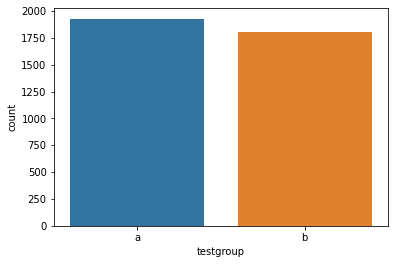

In [28]:
sns.countplot(ab_df_2.testgroup)

# видим, что число клиентов которые совершили покупку выше в контрольной группе

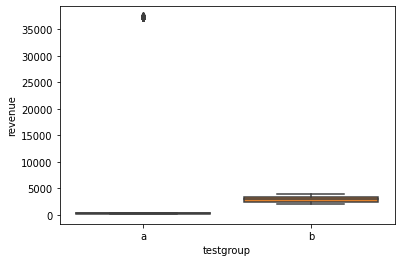

In [29]:
# построим барплоты для доходов тестгрупп

sns.boxplot(x='testgroup', y='revenue', data=ab_df_2)

# непонятно, а здорово)

In [30]:
# посмотрим на описательные статистики

ab_df_2.describe()

# видим что максимальное значение в колонке revenue больше 37000,
# при этом 75 процентиль = 3126 (75 процентов ввсех покупок совершили на сумму 3126 и меньше)

,revenue
count,3733.000000
mean,2828.232521
std,6516.770722
min,200.000000
25%,309.000000
50%,2052.000000
75%,3126.000000
max,37433.000000


In [31]:
# отсортируем колонку revenue по убыванию

ab_df_2.revenue.sort_values(ascending=False)

# неясно какое количсетво строк имеет revenue больше 3700

101861    37433
196601    37407
65077     37394
21585     37385
142804    37379
          ...  
246509      200
119128      200
393140      200
104975      200
230062      200
Name: revenue, Length: 3733, dtype: int64

In [32]:
# отберем строки, значение revenue которых более 35000

ab_df_2.query('revenue > 35000')

# видим, что их 123
# ПРИМЕЧАТЕЛЬНО, что разница между платящими игроками тестгрупп тоже = 123 
#(При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667)

# можно предположить, что что-то повлияло на 123 пользователей совершить дорогостоящие покупки 
#(т.н. выбросы на боксплоте) - возможно покупка годового абоненмента и т.д. 
# но вопрос почему тольков контрольная группа? Имеющиеся данные не дают это понять

,revenue,testgroup
416,37324,a
4428,37304,a
5777,37315,a
8065,37307,a
8743,37334,a
...,...,...
360696,37347,a
378668,37297,a
389341,37298,a
394580,37302,a


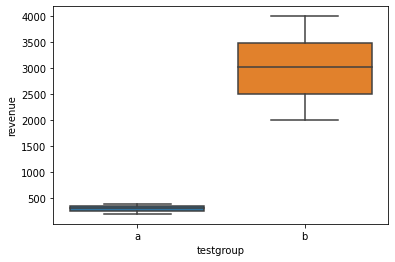

In [33]:
# попробуем построить график без этих 123 строк

sns.boxplot(x='testgroup', y='revenue', data=ab_df_2.query('revenue < 35000'))

In [60]:
# посмотрим на разницу средних значений тестгрупп

data = ab_df_2.query('revenue < 35000')
data

,revenue,testgroup
72,351,a
160,3797,b
341,290,a
377,3768,b
385,250,a
...,...,...
404315,262,a
404525,3120,b
404543,369,a
404602,251,a


In [62]:
data.groupby(['testgroup'])\
    .agg({'revenue': 'mean'})

# видим что разница более чем на 2500

,revenue
testgroup,
a,302.458172
b,3003.658172


In [63]:
# воспользуемся для сравнения средних t-тестом, 
# хотя по боксплоту видно, что даже значения 25 и 75 процентилей сильно отдалены 
# предположим, что нулевая гипотеза верна, 

stats.ttest_ind(data.query('testgroup == "a"').revenue, 
                data.query('testgroup == "b"').revenue)

# мы применили тест Стьюдента который сранил два средних значения по нашей выборке и  pvalue=0.0
# если бы была верна нулевая гипотеза и средние не различались, 
# то вероятность получить такие или более явные различия составили бы 0% 
# альтернативную гипотезу, о том что средние статзначимо отличаются  принимаем
# тест показал нам, что в нашем эксперементе мы смогли получить стастически значимые различия 
# и в тестовой группе набор предложений можно считать лучшим, чем в контрольной,
# если не принимать во внимание выбросы, сформированные 123 пользователями 
# в контрольной группе с доходом от  них по 37 тысяч

Ttest_indResult(statistic=-199.39722533995328, pvalue=0.0)

Задание 3

В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. В них игроки могут получить уникальные предметы для сада и персонажей, дополнительные монеты или бонусы. Для получения награды требуется пройти ряд уровней за определенное время. С помощью каких метрик можно оценить результаты последнего прошедшего события?

Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?

Тематические события, ограниченные по времени направлены на:

1 увеличение времени, проводимого в игре и  как следствие поддержание интереса
2 продления ежемесячных платных подписок
3 дополнительных покупок, совершаемых пользователем

Пояснения по каждому пункту:

1 могу предположить, что метрика "среднее время пользователя" в игре увеличится во время тематических событий, к примеру в игре World of Warcraft такие события как ярмарка новолуния, любовная лихорадка, новогодние квесты, привлекают пользователей дополнительными квестами и помимо основных событий еще необходимо время для выполнения тематических

2 также на примере игры World of Warcraft, предположим пользователь после выхода отдона прокачал на максимум своего героя, и может не проплачивать еще месяц, а при наличии тематического события может возобновить подписку. Метрика среднее количество продленных подписок в период тематического события возможно покажет рост

3 некоторые тематические события предполагают дополнительные покупки в игре, какие-то монеты или другие ресурсы для получения уникальных предметов для персонажей. Предположу, что метрика "число дополнительных покупок" в период тематических событий увеличится


При усложненной механике событий предположу, что следует дополнительно посмотреть на отношение часла игроков продолжающих после неудачной попытки к числу игроков переставших продолжать. Т.е. поосмотреть, какой процент игроков самые "упоротые/упертые")